# Boom Bikes Bike Sharing Model

## Problem Statement
A US bike-sharing provider Boom Bikes has recently suffered considerable dips in their revenues due to the ongoing Corona 
pandemic. Boom Bikes has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as 
the on-going lockdown comes to an end, and the economy restores to a healthy state. 
Boom Bikes aspires to understand the demand for shared bikes among the people to cater to the people's needs once the 
situation gets better all around and stand out from other service providers and make huge profits. 
We have to build a multiple linear regression model for the prediction of demand for shared bikes.

### Essentially the company wants to know
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands


## Import Required Libraries and Ignore Warnings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Understanding the data

### Load Data

In [3]:
bike = pd.read_csv('day.csv')
bikeData = pd.read_csv('day.csv')
print(bikeData.shape)

(730, 16)


### Get the Number of Rows and Columns

### Since there are large nuber of rows and columns, set Max rows and Max columns

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 60)

### First few records to get basic information of the data

In [5]:
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# To see basic information about the dataset
bikeData.info(verbose=True, show_counts=True)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Confirm that there are no null values

bikeData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Observation:

- There are no null values in the data set.

In [8]:
bikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##  Data Clean Up

### Remove duplicte rows

In [9]:
bikeData.instant.nunique()

730

### Observation:

- Number of unique rows and number of rows to remoe match so there are no duplicte rows to be removed
- There are no columns with single values
- There are no blank rows in the data set
- There are no mis-aligned columns in the data set

### Rename columns for better clarity

In [10]:
bikeData.rename( columns = { 'instant' : 'id', 'dteday' : 'date', 'yr' : 'year', 'mnth' : 'month', 
                            'weathersit' : 'weatherSituation', 'hum' : 'humidity', 'cnt' : 'totalCount'  } , inplace=True )



### Column names after renaming

In [11]:
bikeData.columns

Index(['id', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weatherSituation', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'totalCount'],
      dtype='object')

### Remove the columns not needed

In [12]:
columnsNotNeeded = ['id', 'date', 'casual', 'registered']
bikeData.drop(columnsNotNeeded, axis=1, inplace=True)

### Shape after removing columns

In [13]:
print(bikeData.shape)

(730, 12)


### Standardize all floats rounded to 2 decimals

In [14]:
bikeData.temp = round(bikeData['temp'].astype(float), 2)
bikeData.atemp = round(bikeData['atemp'].astype(float), 2)
bikeData.humidity = round(bikeData['humidity'].astype(float), 2)
bikeData.windspeed = round(bikeData['windspeed'].astype(float), 2)

### Map integer variables to categorical string values 

#### Map seasons

In [15]:
bikeData.season = bikeData.season.map( { 1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter' } )

#### Map month

In [16]:
bikeData.month = bikeData.month.map( { 1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 
                                       7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec' } )

#### Map weekday

In [17]:
bikeData.weekday = bikeData.weekday.map( { 0 : 'Sun', 1 : 'Mon', 2 : 'Tue', 3 : 'Wed', 4 : 'Thu', 5 : 'Fri', 6 : 'Sat' } )

#### Map weather situation

In [18]:
bikeData.weatherSituation = bikeData.weatherSituation.map( { 1 : 'ClearWeather', 2 : 'MistyWeather', 3 : 'LightSnowRain', 4 : 'HeavySnowRain' } )

#### Data after mapping categoical Strings

In [19]:
bikeData.head()

,season,year,month,holiday,weekday,workingday,weatherSituation,temp,atemp,humidity,windspeed,totalCount
0,spring,0,Jan,0,Sat,0,MistyWeather,14.11,18.18,80.58,10.75,985
1,spring,0,Jan,0,Sun,0,MistyWeather,14.90,17.69,69.61,16.65,801
2,spring,0,Jan,0,Mon,1,ClearWeather,8.05,9.47,43.73,16.64,1349
3,spring,0,Jan,0,Tue,1,ClearWeather,8.20,10.61,59.04,10.74,1562
4,spring,0,Jan,0,Wed,1,ClearWeather,9.31,11.46,43.70,12.52,1600


### Dummy Variables

The variables season, month, weekday and weatherSituation are categorical variables and we need to create dummy integer variables for each of the categories from them to have additional features for better analysis

In [20]:
seasonVars = pd.get_dummies( bikeData['season'], drop_first = True )
bikeData = pd.concat([bikeData, seasonVars], axis = 1)

weatherVars = pd.get_dummies(bikeData['weatherSituation'], drop_first = True)
bikeData = pd.concat([bikeData, weatherVars], axis = 1)

monthVars = pd.get_dummies(bikeData['month'], drop_first = True)
bikeData = pd.concat([bikeData, monthVars], axis = 1)

dayVars = pd.get_dummies(bikeData['weekday'], drop_first = True)
bikeData = pd.concat([bikeData, dayVars], axis = 1)

Data set after adding dummy varables for categorical columns

In [21]:
bikeData.shape

(730, 34)

In [22]:
bikeData.head()

,season,year,month,holiday,weekday,workingday,weatherSituation,temp,atemp,humidity,windspeed,totalCount,spring,summer,winter,LightSnowRain,MistyWeather,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,MistyWeather,14.11,18.18,80.58,10.75,985,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,spring,0,Jan,0,Sun,0,MistyWeather,14.90,17.69,69.61,16.65,801,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,spring,0,Jan,0,Mon,1,ClearWeather,8.05,9.47,43.73,16.64,1349,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
3,spring,0,Jan,0,Tue,1,ClearWeather,8.20,10.61,59.04,10.74,1562,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,spring,0,Jan,0,Wed,1,ClearWeather,9.31,11.46,43.70,12.52,1600,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


### Visualize categorical variables against target variable count using box plot

#### Box plots for count against weekday, year, season, weatherSituation, month and working data

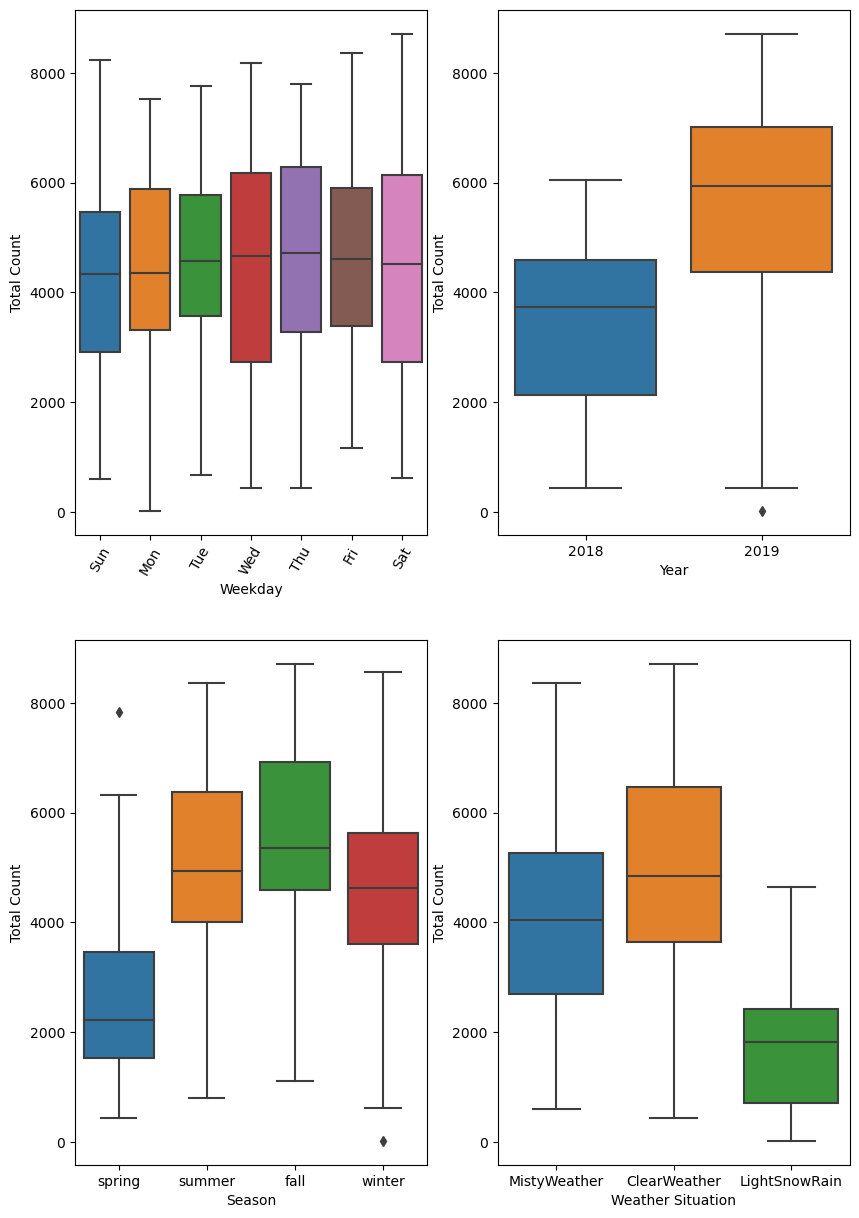

In [23]:
plt.figure(figsize = (10, 15))
plt.subplot(2,2,1)
dayOrder = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
sns.boxplot(x = 'weekday', y = 'totalCount', data = bikeData, order = dayOrder)
plt.xticks(rotation=60)
plt.xlabel('Weekday')
plt.ylabel('Total Count')

plt.subplot(2,2,2)
sns.boxplot(x = 'year', y = 'totalCount', data = bikeData)
plt.xticks(ticks=[0, 1], labels=['2018', '2019'])
plt.xlabel('Year')
plt.ylabel('Total Count')

plt.subplot(2,2,3)
sns.boxplot(x = 'season', y = 'totalCount', data = bikeData)
plt.xlabel('Season')
plt.ylabel('Total Count')

plt.subplot(2,2,4)
sns.boxplot(x = 'weatherSituation', y = 'totalCount', data = bikeData)
plt.xlabel('Weather Situation')
plt.ylabel('Total Count')

plt.show()

In [24]:
sumTotal = bikeData['totalCount'].sum()
print(sumTotal)
table = bikeData.pivot_table(index='year', values=['totalCount'], aggfunc='sum')
table['Percent'] = table['totalCount'] / sumTotal * 100
table.style.format("{:.0f}")

3290845


,totalCount,Percent
year,,
0,1243103,38
1,2047742,62


In [25]:
sumTotal = bikeData['totalCount'].sum()
print(sumTotal)
table1 = bikeData.pivot_table(index='weekday', values=['totalCount'], aggfunc='sum')
table1['Percent'] = table1['totalCount'] / sumTotal * 100
table1.style.format("{:.0f}")

3290845


,totalCount,Percent
weekday,,
Fri,487790,15
Mon,455503,14
Sat,477807,15
Sun,444027,13
Thu,485395,15
Tue,469109,14
Wed,471214,14


Text(0, 0.5, 'Total Count')

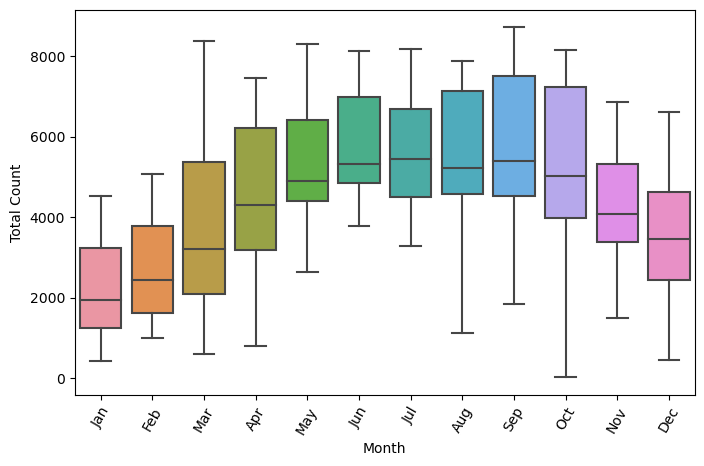

In [26]:
plt.figure(figsize = (8, 5))
monthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x = 'month', y = 'totalCount', data = bikeData, order = monthOrder)
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Total Count')

Text(0, 0.5, 'Total Count')

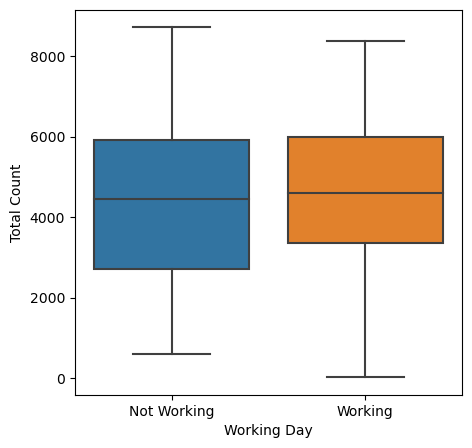

In [27]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = 'workingday', y = 'totalCount', data = bikeData)
plt.xticks(ticks=[0, 1], labels=['Not Working', 'Working'])
plt.xlabel('Working Day')
plt.ylabel('Total Count')

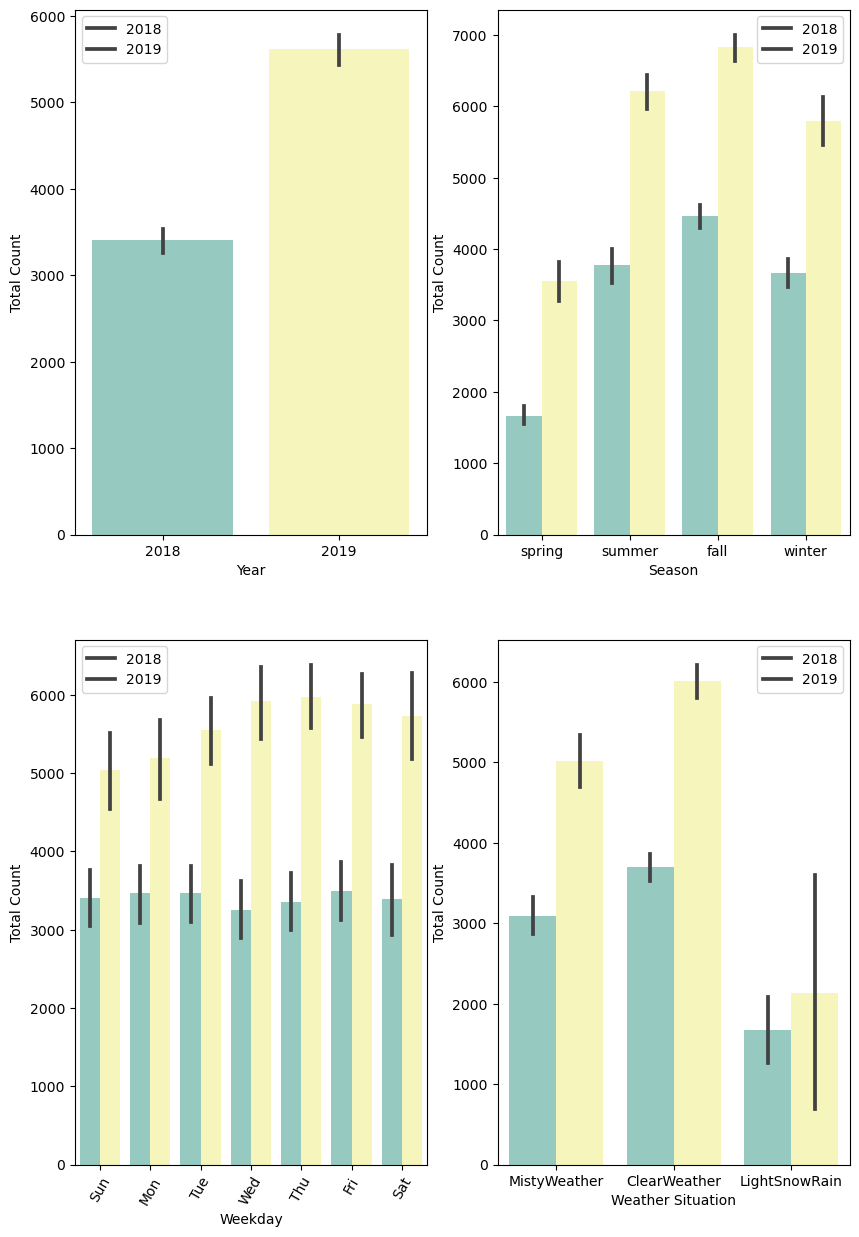

In [28]:
plt.figure(figsize = (10, 15))

plt.subplot(2,2,1)
sns.barplot(x = 'year', y = 'totalCount', data = bikeData, palette='Set3')
plt.xticks(ticks=[0, 1], labels=['2018', '2019'])
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.legend(labels=['2018', '2019'])

plt.subplot(2,2,2)
sns.barplot(x = 'season', y = 'totalCount', data = bikeData, hue='year', palette='Set3')
plt.xlabel('Season')
plt.ylabel('Total Count')
plt.legend(labels=['2018', '2019'])

plt.subplot(2,2,3)
dayOrder = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
sns.barplot(x = 'weekday', y = 'totalCount', data = bikeData, order = dayOrder, hue='year', palette='Set3')
plt.xticks(rotation=60)
plt.xlabel('Weekday')
plt.ylabel('Total Count')
plt.legend(labels=['2018', '2019'])

plt.subplot(2,2,4)
sns.barplot(x = 'weatherSituation', y = 'totalCount', data = bikeData, hue='year', palette='Set3')
plt.xlabel('Weather Situation')
plt.ylabel('Total Count')
plt.legend(labels=['2018', '2019'])

plt.show()

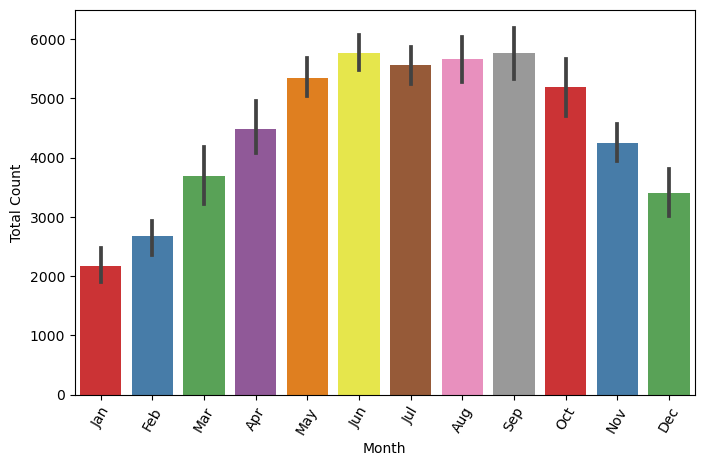

In [29]:
plt.figure(figsize = (8, 5))
monthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x = 'month', y = 'totalCount', data = bikeData, order = monthOrder, palette='Set1')
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()

#### Observations from the box plots and bar plots

- There are no outliers seen in any of the box plots and no outlier treatment is needed for this data set.
- The average demand is almost the same for all days in the range of 4000 to 5000 approximately 
- The average demand is not impacted much by days
- The average bike demand shows increase by 24% (approximately from 38% to 62%) in the year 2019
- Bike demand looks maximum during fall and summer followed by winter and least during spring
- Clear weather shows maximum demand followed by misty weather.
- Bike demand falls during light snow rain and is nill during heavy snow with rain
- Bike demand is generally higher during May to October being the highest in July
- There is no impact of working day / holiday on bike demand which is inline with the finding from the demand on all week days

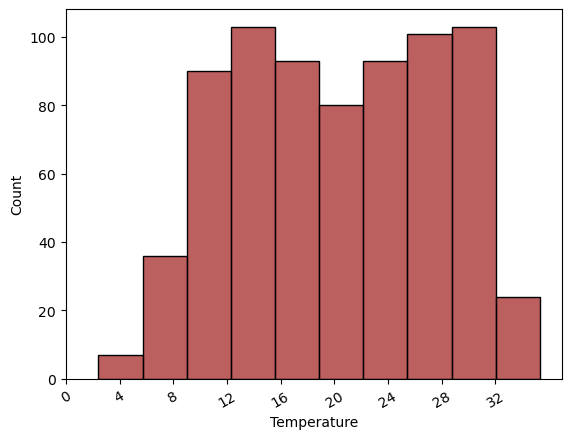

In [30]:
sns.histplot(bikeData, x='temp', bins=10, color='brown')
plt.xticks(list( range(0, 36, 4) ), rotation=30)
plt.xlabel("Temperature")
plt.show()

#### Observations from the histogram for temperature

- The demand is high for high temperatures and low for temperatures below 8 above 32

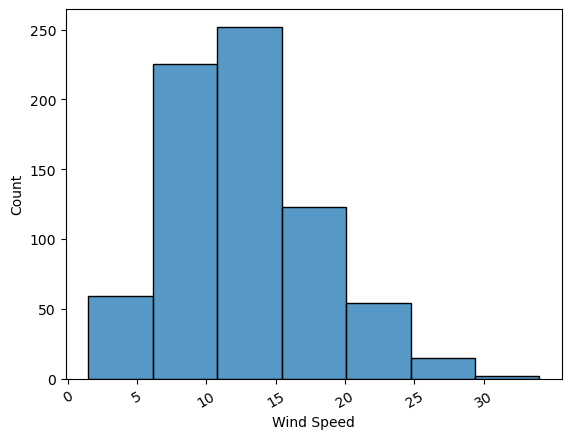

In [31]:
sns.histplot(bikeData, x='windspeed', bins=7)
plt.xticks(list( range(0, 35, 5) ), rotation=30)
plt.xlabel("Wind Speed")
plt.show()

#### Observations from the histogram for wind speed

- Bike demand is high for windspeed in range 5 to 20
- The demand is low for wind speed below 5 and above 20

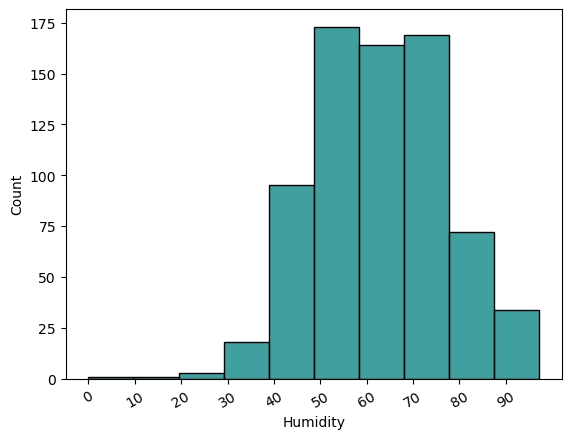

In [32]:
sns.histplot(bikeData, x='humidity', bins=10, color='teal')
plt.xticks(list( range(0, 100, 10) ), rotation=30)
plt.xlabel("Humidity")
plt.show()

#### Observations from the histogram for wind speed

- Bike demand is high for humidity above 40 and is maximum in the range of 50 to 70

### Analysis of Numerical Variables

In [33]:
numericalVars = ['temp', 'atemp', 'humidity', 'windspeed', 'totalCount']

In [34]:
bikeData[numericalVars].describe()

,temp,atemp,humidity,windspeed,totalCount
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319329,23.726384,62.765082,12.763699,4508.006849
std,7.506827,8.150247,14.237634,5.195640,1936.011647
min,2.420000,3.950000,0.000000,1.500000,22.000000
25%,13.810000,16.892500,52.000000,9.040000,3169.750000
50%,20.465000,24.370000,62.625000,12.130000,4548.500000
75%,26.882500,30.445000,72.990000,15.627500,5966.000000
max,35.330000,42.040000,97.250000,34.000000,8714.000000


### Pair Plot for data set

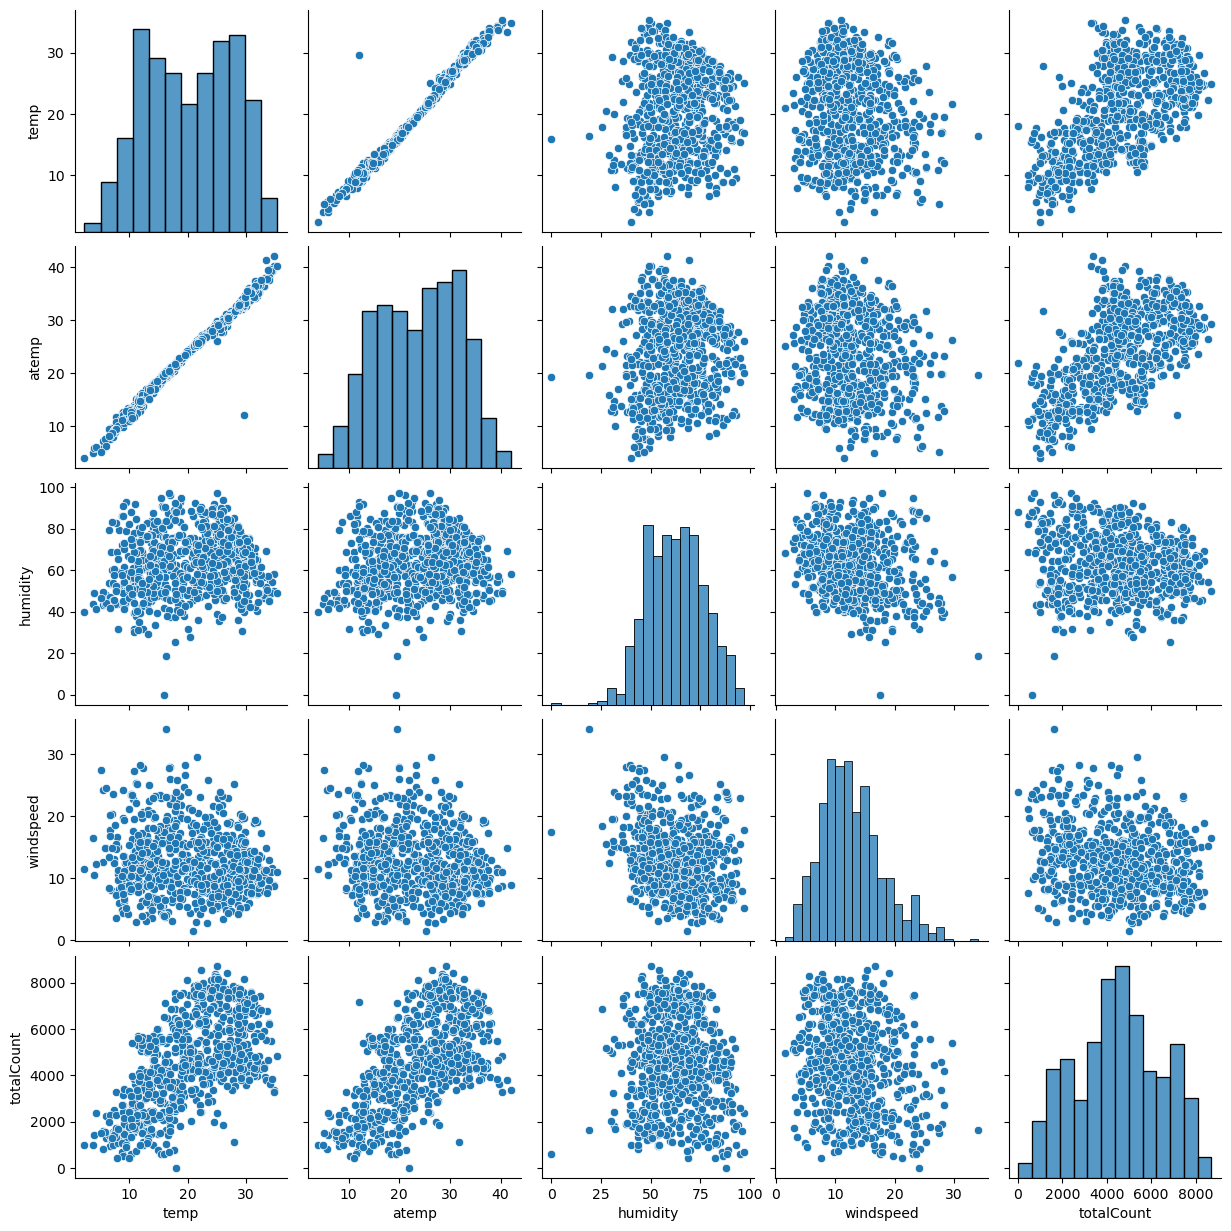

In [35]:
sns.pairplot(data=bikeData[numericalVars])

### Observations from the Pair plot
- From the pair plot we see a strong relation between temperature and total bike demand
- Atemp also has a strong relation with bike demand
- Atemp and temp have a clear linear relationshp wih on outlier in atemp

### Heat Map for the data set

<Axes: >

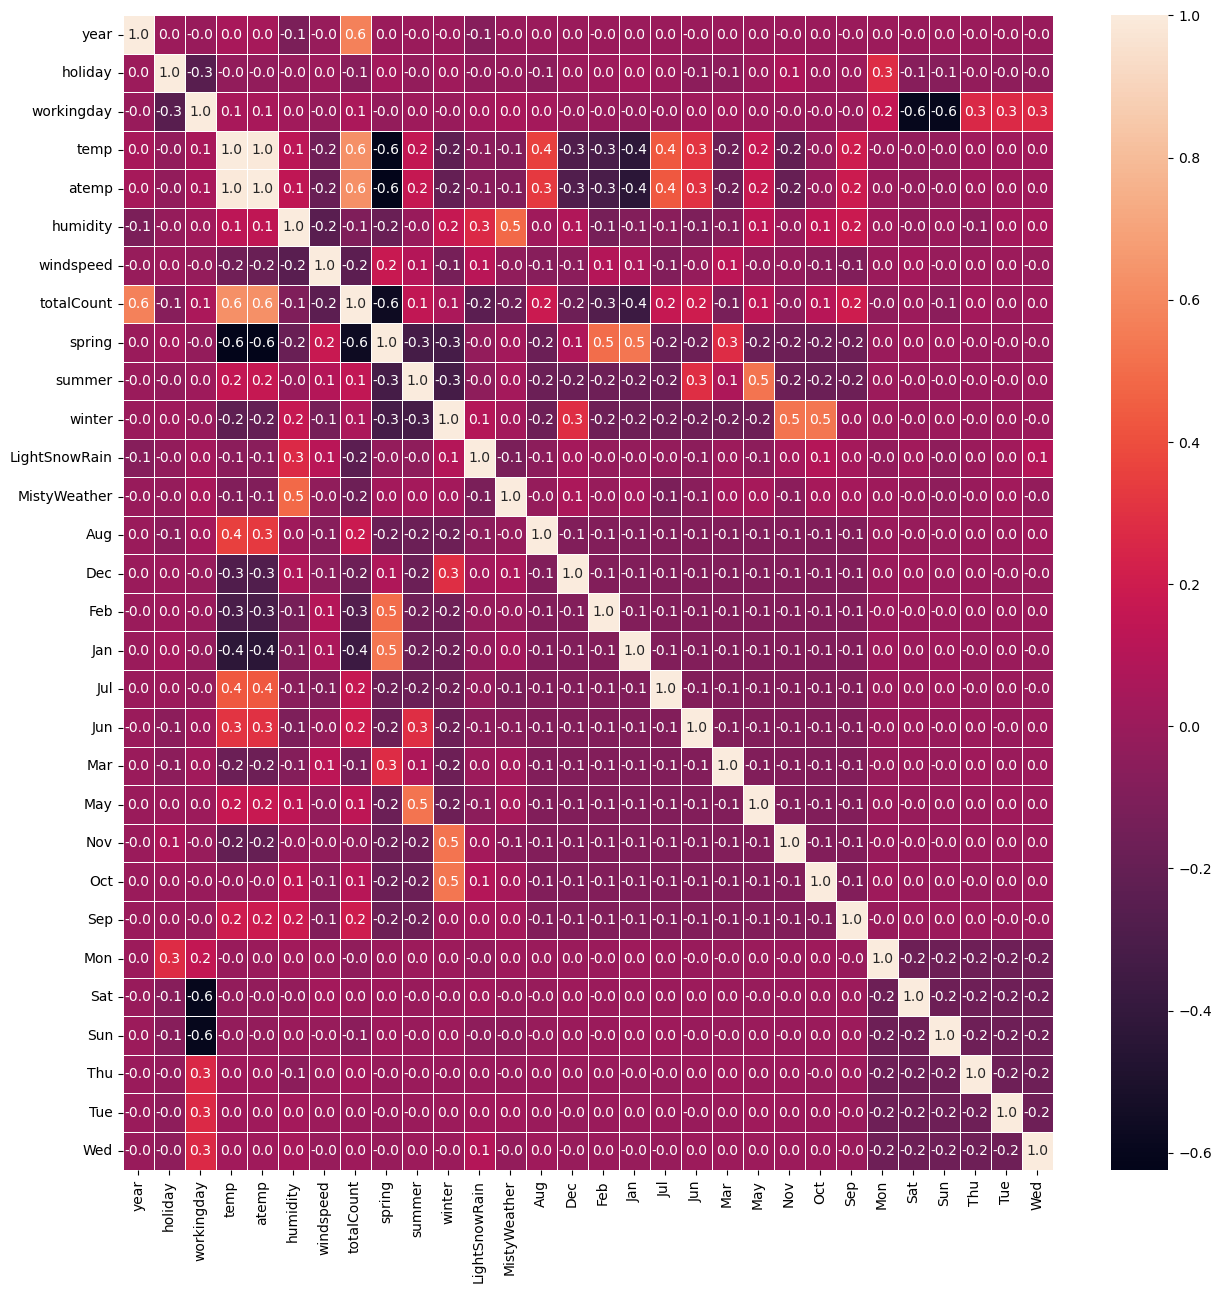

In [36]:
bike2 = bikeData.copy()

nonNumeriCols = ['season', 'month', 'weekday', 'weatherSituation']
bike2.drop(nonNumeriCols, axis=1, inplace=True)
plt.figure(figsize=(15, 15))
sns.heatmap(bike2.corr(), annot=True, fmt='.1f', linewidth=0.5)

<Axes: >

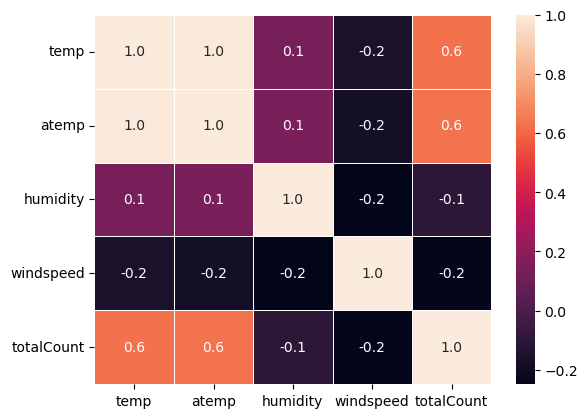

In [37]:
numericalVars = ['temp', 'atemp', 'humidity', 'windspeed', 'totalCount']
sns.heatmap(bikeData[numericalVars].corr(), annot=True, fmt='.1f', linewidth=0.5)

### Observations from the Heat Map
- Temp and Atemp have high positive correlation(1.0) and hence we may consider using only 1 of those columns - actual temperature while building the model. 
- We select actual temperature as it is more accurate and feel like temperature is not very accurate representation of the temperature
- There is high negative correlation between woringday and Saturday/Sunday which supports the fact that they are non working days
- Spring has corrlation with Jan/Feb and summer has wit May
- Winter is correlated with Oct and Nov
- Temperature has highest negative correlation with Spring
- Total demand has high correlation with year, temperature ad negative correlation with Spring

### Split the data set into training and test data sets

#### Drop the non numeric columns before building the model

In [38]:
nonNumericVars = ['season', 'month', 'weekday', 'weatherSituation']
bikeData.drop(nonNumericVars, axis=1, inplace=True)

In [39]:
bikeData.shape

(730, 30)

#### Use Random seed to have same test and train data set always

In [40]:
np.random.seed(0)
data_train, data_test = train_test_split(bikeData, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scale the training data set

- We will rescale the variables to have a comparable scale. If scales are not comparable, then some of the coefficients obtained by fitting the regression model might be very large or very small compared to the other coefficients. We may use standardization or normalization so that the units of the coefficients are on the same scale. 
- We will use min max scaling to rescale the model.
- Min Max scaling would be applied to all numerical variables except dummy variables and string variables

In [41]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

data_train[numericalVars] = scaler.fit_transform(data_train[numericalVars])

print(data_train.shape)

(510, 30)


### View the key statistics after scaling

In [42]:
data_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,totalCount,spring,summer,winter,LightSnowRain,MistyWeather,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509875,0.501181,0.575330,0.300930,0.864243,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
576,1,0,1,0.815254,0.766343,0.725680,0.264678,0.827658,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
426,1,0,0,0.442419,0.438960,0.640148,0.255374,0.465255,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
728,1,0,0,0.245214,0.200315,0.498042,0.663138,0.204096,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
482,1,0,0,0.395624,0.391966,0.504534,0.188643,0.482973,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


### Dividing training into X and Y sets for the model building

In [43]:
Y_train = data_train.pop('totalCount')
X_train = data_train

## Building the model

- Automated model building using SciKit Learn
- LinearRegression using RFE - Recursive Feature Elimination
- Start with 15 features

In [44]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, Y_train)

#### List RFE support and rankings for all columns in the data set
- RFE support is True for selected features and False otherwise
- RFE ranking is 1 for all the selected features and greater than 1 for other features in order of importance

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('LightSnowRain', True, 1),
 ('MistyWeather', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 2),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13)]

#### List of features selected for the model

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'winter', 'LightSnowRain', 'MistyWeather', 'Jan', 'Jul',
       'Sep', 'Sat', 'Sun'],
      dtype='object')

#### Features not selected in the model

In [47]:
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Create dataframe with RFE selected variables

In [48]:
X_train_model = X_train[col]

#### Add a constant to the model as stats model fits line through origin by default if constant is not added
- Fit the model

In [49]:
def modelFunction(xtrain):
    xtrain = sm.add_constant(xtrain)
    # Fit the model and find co-efficients of all independent variables in such a way that error/residual is minimised
    lr = sm.OLS(Y_train.astype(float), xtrain.astype(float)).fit()
    return lr, xtrain

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

def VIF(vif1):
    vif1['Features'] = X_train_model.columns
    vif1['VIF'] = [variance_inflation_factor(X_train_model.values.astype(float), i) for i in range(X_train_model.shape[1])]
    vif1['VIF'] = round(vif['VIF'], 2)
    vif1 = vif.sort_values(by = "VIF", ascending = False)
    return vif1

In [51]:
lr, xtrain = modelFunction(X_train_model)
X_train_model = xtrain

#### View the detailed statistics of the model

In [52]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.09e-190
Time:                        01:19:15   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2503      0.025      9.864      0.000       0.200       0.300
year              0.2316      0.008     28.669      0.000       0.216       0.247
holiday          -0.0060      0.021     -0.285      0.776      -0.048       0.036
workingday        0.0965      0.009     10.419      0.000       0.078       0.115
temp              0.4611      0.031     14.684      0.000       0.399       0.523
humidity         -0.1419      0.038     -3.783      0.000      -0.216      -0.068
windspeed        -0.1758      0.026     -6.880      0.000      -0.226      -0.126
spring           -0.0979      0.015     -6.421      0.000      -0.128      -0.068
winter            0.0538      0.012      4.352      0.000       0.030       0.078
LightSnowRain    -0.2538      0.026     -9.669      0.000      -0.305      -0.202
MistyWeather     -0.0593      0.010     -5.660      0.000      -0.080      -0.039
Jan              -0.0402      0.017     -2.304      0.022      -0.074      -0.006
Jul              -0.0744      0.017     -4.357      0.000      -0.108      -0.041
Sep               0.0602      0.015      3.918      0.000       0.030       0.090
Sat               0.1066      0.011      9.369      0.000       0.084       0.129
Sun               0.0533      0.012      4.462      0.000       0.030       0.077
==============================================================================
Omnibus:                       63.285   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.263
Skew:                          -0.629   Prob(JB):                     5.82e-36
Kurtosis:                       5.460   Cond. No.                     5.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Calculate the VIF for all features

In [53]:
vif = VIF(vif)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
14,Sat,inf
15,Sun,inf
4,temp,3.19
7,spring,2.72
5,humidity,1.90
8,winter,1.81
10,MistyWeather,1.57
11,Jan,1.55


## Observations

- Holiday has a high p-Value of 0.776
- The high p-Value indicates that holiday is not significant contributor in bike demand
- Holiday aslo has very high VIF of Infinity
- This would be the first candidate to remove from the model
- The R2 and Adjusted R2 are very close and hence good
- The infinite VIF is seen here due to features with high correlation.

In [54]:
X_train_model = X_train_model.drop(["holiday"], axis=1)
X_train_model.columns

Index(['const', 'year', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'winter', 'LightSnowRain', 'MistyWeather', 'Jan', 'Jul',
       'Sep', 'Sat', 'Sun'],
      dtype='object')

In [55]:
lr, xtrain = modelFunction(X_train_model)
X_train_model = xtrain

In [56]:
# Get the Model Statistics
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.09e-190
Time:                        01:19:16   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2443      0.040      6.119      0.000       0.166       0.323
year              0.2316      0.008     28.669      0.000       0.216       0.247
workingday        0.1026      0.026      4.014      0.000       0.052       0.153
temp              0.4611      0.031     14.684      0.000       0.399       0.523
humidity         -0.1419      0.038     -3.783      0.000      -0.216      -0.068
windspeed        -0.1758      0.026     -6.880      0.000      -0.226      -0.126
spring           -0.0979      0.015     -6.421      0.000      -0.128      -0.068
winter            0.0538      0.012      4.352      0.000       0.030       0.078
LightSnowRain    -0.2538      0.026     -9.669      0.000      -0.305      -0.202
MistyWeather     -0.0593      0.010     -5.660      0.000      -0.080      -0.039
Jan              -0.0402      0.017     -2.304      0.022      -0.074      -0.006
Jul              -0.0744      0.017     -4.357      0.000      -0.108      -0.041
Sep               0.0602      0.015      3.918      0.000       0.030       0.090
Sat               0.1126      0.027      4.171      0.000       0.060       0.166
Sun               0.0593      0.027      2.186      0.029       0.006       0.113
==============================================================================
Omnibus:                       63.285   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.263
Skew:                          -0.629   Prob(JB):                     5.82e-36
Kurtosis:                       5.460   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Get the VIF
vif = pd.DataFrame()
vif = VIF(vif)
vif

,Features,VIF
0,const,101.19
2,workingday,9.07
13,Sat,6.06
14,Sun,5.74
3,temp,3.19
6,spring,2.72
4,humidity,1.90
7,winter,1.81
9,MistyWeather,1.57
10,Jan,1.55


## Observations

- All p-Values are now 0 except Jan and Sun which have p-Values of 0.022 and 0.029 which are below 0.05 and acceptable 
- The VIF values for workingday, Sat and Sun are now not infinity but are still high
- We will now consider a model dropping workingday

In [58]:
X_train_model = X_train_model.drop(["workingday"], axis=1)
X_train_model.columns

Index(['const', 'year', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'LightSnowRain', 'MistyWeather', 'Jan', 'Jul', 'Sep', 'Sat', 'Sun'],
      dtype='object')

In [59]:
lr, xtrain = modelFunction(X_train_model)
X_train_model = xtrain

In [60]:
# Get the Model Statistics
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.56e-188
Time:                        01:19:16   Log-Likelihood:                 505.98
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     496   BIC:                            -924.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3447      0.032     10.911      0.000       0.283       0.407
year              0.2321      0.008     28.306      0.000       0.216       0.248
temp              0.4618      0.032     14.490      0.000       0.399       0.524
humidity         -0.1428      0.038     -3.749      0.000      -0.218      -0.068
windspeed        -0.1782      0.026     -6.874      0.000      -0.229      -0.127
spring           -0.1007      0.015     -6.508      0.000      -0.131      -0.070
winter            0.0506      0.013      4.038      0.000       0.026       0.075
LightSnowRain    -0.2489      0.027     -9.354      0.000      -0.301      -0.197
MistyWeather     -0.0572      0.011     -5.389      0.000      -0.078      -0.036
Jan              -0.0411      0.018     -2.320      0.021      -0.076      -0.006
Jul              -0.0737      0.017     -4.254      0.000      -0.108      -0.040
Sep               0.0565      0.016      3.627      0.000       0.026       0.087
Sat               0.0140      0.011      1.232      0.218      -0.008       0.036
Sun              -0.0392      0.012     -3.332      0.001      -0.062      -0.016
==============================================================================
Omnibus:                       79.506   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.420
Skew:                          -0.756   Prob(JB):                     5.04e-49
Kurtosis:                       5.860   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Get the VIF
vif = pd.DataFrame()
vif = VIF(vif)
vif

,Features,VIF
0,const,61.49
2,temp,3.19
5,spring,2.71
3,humidity,1.90
6,winter,1.81
8,MistyWeather,1.57
9,Jan,1.55
10,Jul,1.31
7,LightSnowRain,1.25
4,windspeed,1.19


#### Observations
- All VIF values are now below 5 and hence there is no significant correlation
- The p-Value for Sat is high 
- High p-Value indicates that Sat is not significant contributor in bike demand
- We will consider a ne model dropping Sat

In [62]:
X_train_model = X_train_model.drop(["Sat"], axis=1)
X_train_model.columns

Index(['const', 'year', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'LightSnowRain', 'MistyWeather', 'Jan', 'Jul', 'Sep', 'Sun'],
      dtype='object')

In [63]:
lr, xtrain = modelFunction(X_train_model)
X_train_model = xtrain

In [64]:
# Get the Model Statistics
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.07e-188
Time:                        01:19:16   Log-Likelihood:                 505.21
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     497   BIC:                            -929.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3481      0.031     11.059      0.000       0.286       0.410
year              0.2317      0.008     28.265      0.000       0.216       0.248
temp              0.4614      0.032     14.470      0.000       0.399       0.524
humidity         -0.1446      0.038     -3.798      0.000      -0.219      -0.070
windspeed        -0.1772      0.026     -6.833      0.000      -0.228      -0.126
spring           -0.1006      0.015     -6.502      0.000      -0.131      -0.070
winter            0.0510      0.013      4.069      0.000       0.026       0.076
LightSnowRain    -0.2483      0.027     -9.325      0.000      -0.301      -0.196
MistyWeather     -0.0569      0.011     -5.358      0.000      -0.078      -0.036
Jan              -0.0409      0.018     -2.308      0.021      -0.076      -0.006
Jul              -0.0733      0.017     -4.226      0.000      -0.107      -0.039
Sep               0.0566      0.016      3.631      0.000       0.026       0.087
Sun              -0.0417      0.012     -3.599      0.000      -0.064      -0.019
==============================================================================
Omnibus:                       74.809   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.003
Skew:                          -0.697   Prob(JB):                     2.78e-48
Kurtosis:                       5.892   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Get the VIF
vif = pd.DataFrame()
vif = VIF(vif)
vif

,Features,VIF
0,const,60.99
2,temp,3.18
5,spring,2.71
3,humidity,1.89
6,winter,1.81
8,MistyWeather,1.56
9,Jan,1.55
10,Jul,1.31
7,LightSnowRain,1.25
4,windspeed,1.19


#### Observations
- All VIF values are still below 5 and hence there is no significant correlation
- The p-Value for Jan is 0.021 while all others are 0.00 
- We will consider a new model dropping Jan

In [66]:
X_train_model = X_train_model.drop(["Jan"], axis=1)
X_train_model.columns

Index(['const', 'year', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'LightSnowRain', 'MistyWeather', 'Jul', 'Sep', 'Sun'],
      dtype='object')

In [67]:
lr, xtrain = modelFunction(X_train_model)
X_train_model = xtrain

In [68]:
# Get the Model Statistics
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.56e-189
Time:                        01:19:16   Log-Likelihood:                 502.49
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     498   BIC:                            -930.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3374      0.031     10.791      0.000       0.276       0.399
year              0.2309      0.008     28.069      0.000       0.215       0.247
temp              0.4796      0.031     15.452      0.000       0.419       0.541
humidity         -0.1494      0.038     -3.912      0.000      -0.224      -0.074
windspeed        -0.1700      0.026     -6.577      0.000      -0.221      -0.119
spring           -0.1096      0.015     -7.283      0.000      -0.139      -0.080
winter            0.0551      0.012      4.425      0.000       0.031       0.080
LightSnowRain    -0.2457      0.027     -9.196      0.000      -0.298      -0.193
MistyWeather     -0.0570      0.011     -5.347      0.000      -0.078      -0.036
Jul              -0.0768      0.017     -4.429      0.000      -0.111      -0.043
Sep               0.0558      0.016      3.564      0.000       0.025       0.087
Sun              -0.0412      0.012     -3.544      0.000      -0.064      -0.018
==============================================================================
Omnibus:                       72.180   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.119
Skew:                          -0.670   Prob(JB):                     8.69e-47
Kurtosis:                       5.861   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Get the VIF
vif = pd.DataFrame()
vif = VIF(vif)
vif

,Features,VIF
0,const,59.66
2,temp,2.99
5,spring,2.54
3,humidity,1.89
6,winter,1.77
8,MistyWeather,1.56
9,Jul,1.30
7,LightSnowRain,1.24
4,windspeed,1.17
10,Sep,1.10


<Axes: >

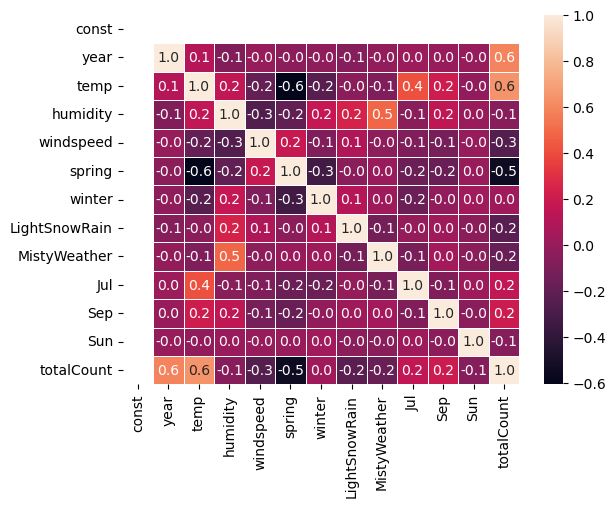

In [70]:
test_df = pd.concat([X_train_model, Y_train], axis=1)
sns.heatmap(test_df.corr(), annot=True, fmt='.1f', linewidth=0.5)

#### Observations
- All VIF values are still below 5 and hence there is no significant correlation
- All p-Values are now 0.00 
- However, the heatmap shows Winter and Sunday are insignificant in bike demand
- We will consider a new model dropping winter

In [71]:
X_train_model = X_train_model.drop(["winter"], axis=1)
X_train_model.columns

Index(['const', 'year', 'temp', 'humidity', 'windspeed', 'spring',
       'LightSnowRain', 'MistyWeather', 'Jul', 'Sep', 'Sun'],
      dtype='object')

In [72]:
lr, xtrain = modelFunction(X_train_model)
X_train_model = xtrain

In [73]:
# Get the Model Statistics
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.48e-186
Time:                        01:19:17   Log-Likelihood:                 492.65
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     499   BIC:                            -916.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3845      0.030     12.844      0.000       0.326       0.443
year              0.2329      0.008     27.849      0.000       0.216       0.249
temp              0.4038      0.026     15.318      0.000       0.352       0.456
humidity         -0.1183      0.038     -3.094      0.002      -0.193      -0.043
windspeed        -0.1773      0.026     -6.746      0.000      -0.229      -0.126
spring           -0.1492      0.012    -12.109      0.000      -0.173      -0.125
LightSnowRain    -0.2452      0.027     -9.012      0.000      -0.299      -0.192
MistyWeather     -0.0631      0.011     -5.860      0.000      -0.084      -0.042
Jul              -0.0764      0.018     -4.328      0.000      -0.111      -0.042
Sep               0.0540      0.016      3.391      0.001       0.023       0.085
Sun              -0.0400      0.012     -3.379      0.001      -0.063      -0.017
==============================================================================
Omnibus:                       56.917   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.230
Skew:                          -0.565   Prob(JB):                     1.76e-32
Kurtosis:                       5.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Get the VIF
vif = pd.DataFrame()
vif = VIF(vif)
vif

,Features,VIF
0,const,52.74
2,temp,2.08
3,humidity,1.83
5,spring,1.64
7,MistyWeather,1.54
8,Jul,1.30
6,LightSnowRain,1.24
4,windspeed,1.17
9,Sep,1.10
1,year,1.03


#### Observations
- All VIF values are still below 5 and hence there is no significant correlation
- p-Values for Sep and Sun are now 0.001 
- Though they are very low, we will consider dropping Sun as it is insignificant in bike demand

In [75]:
X_train_model = X_train_model.drop(["Sun"], axis=1)
X_train_model.columns

Index(['const', 'year', 'temp', 'humidity', 'windspeed', 'spring',
       'LightSnowRain', 'MistyWeather', 'Jul', 'Sep'],
      dtype='object')

In [76]:
lr, xtrain = modelFunction(X_train_model)
X_train_model = xtrain

In [77]:
# Get the Model Statistics
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.40e-184
Time:                        01:19:17   Log-Likelihood:                 486.88
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     500   BIC:                            -911.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3823      0.030     12.640      0.000       0.323       0.442
year              0.2327      0.008     27.540      0.000       0.216       0.249
temp              0.4080      0.027     15.335      0.000       0.356       0.460
humidity         -0.1281      0.039     -3.327      0.001      -0.204      -0.052
windspeed        -0.1790      0.027     -6.744      0.000      -0.231      -0.127
spring           -0.1485      0.012    -11.934      0.000      -0.173      -0.124
LightSnowRain    -0.2386      0.027     -8.702      0.000      -0.292      -0.185
MistyWeather     -0.0600      0.011     -5.534      0.000      -0.081      -0.039
Jul              -0.0789      0.018     -4.425      0.000      -0.114      -0.044
Sep               0.0556      0.016      3.453      0.001       0.024       0.087
==============================================================================
Omnibus:                       53.449   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.654
Skew:                          -0.557   Prob(JB):                     3.14e-28
Kurtosis:                       5.173   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Get the VIF
vif = pd.DataFrame()
vif = VIF(vif)
vif

,Features,VIF
0,const,52.71
2,temp,2.08
3,humidity,1.81
5,spring,1.64
7,MistyWeather,1.53
8,Jul,1.29
6,LightSnowRain,1.24
4,windspeed,1.17
9,Sep,1.10
1,year,1.03


In [79]:
X_train_model = X_train_model.drop(["Sep"], axis=1)
X_train_model.columns

Index(['const', 'year', 'temp', 'humidity', 'windspeed', 'spring',
       'LightSnowRain', 'MistyWeather', 'Jul'],
      dtype='object')

In [80]:
lr, xtrain = modelFunction(X_train_model)
X_train_model = xtrain

In [81]:
# Get the Model Statistics
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.82e-183
Time:                        01:19:17   Log-Likelihood:                 480.88
No. Observations:                 510   AIC:                            -943.8
Df Residuals:                     501   BIC:                            -905.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3763      0.031     12.330      0.000       0.316       0.436
year              0.2323      0.009     27.195      0.000       0.215       0.249
temp              0.4254      0.026     16.113      0.000       0.374       0.477
humidity         -0.1218      0.039     -3.134      0.002      -0.198      -0.045
windspeed        -0.1855      0.027     -6.932      0.000      -0.238      -0.133
spring           -0.1491      0.013    -11.850      0.000      -0.174      -0.124
LightSnowRain    -0.2355      0.028     -8.502      0.000      -0.290      -0.181
MistyWeather     -0.0594      0.011     -5.421      0.000      -0.081      -0.038
Jul              -0.0900      0.018     -5.079      0.000      -0.125      -0.055
==============================================================================
Omnibus:                       52.227   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.247
Skew:                          -0.540   Prob(JB):                     6.35e-28
Kurtosis:                       5.174   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations
- The above model with 8 vriables looks good with R2 of 0.824 and adjusted R2 od 0.821
- All VIF are very low and in acceptable range
- The p-Values are 0.000 and 0.001 which indicates all variables are significant in predicting demand

In [82]:
# Get the VIF
vif = pd.DataFrame()
vif = VIF(vif)
vif

,Features,VIF
0,const,52.54
2,temp,2.00
3,humidity,1.81
5,spring,1.64
7,MistyWeather,1.53
8,Jul,1.25
6,LightSnowRain,1.24
4,windspeed,1.16
1,year,1.03


## Step 7: Residual Analysis of the train data

- Here we want to check if the error terms are also normally distributed 
- Normal distribution,  is one of the major assumptions of linear regression
- Use the model to get the predicted values on the training data set
- Let us plot the histogram of the error terms and see what it looks like.

In [83]:
Y_train_pred = lr.predict(X_train_model)

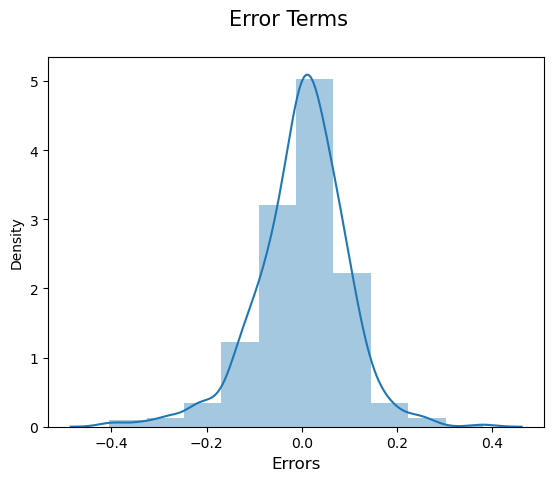

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 10)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label
plt.show()

## Step 7: Residual Analysis of the train data

- All vif values are 2 and below and p-Values are very low - 0.000 or 0.001
- We clearly see a normal distributon of Error terms 
- The R2 is 0.824 and Adjusted R2 = 0.821
- This indicates that the model is approximately able to explain 82% of variance in the data set
- The difference between R2 and Adjusted R2 is small indicating that it is overall a good model

## Get Mean Square Error and R2 Score

- Get MSE using mean_squared_error from SK Learn
- Get Rsquared using R2 score from SK Learn 

In [85]:
mse = mean_squared_error(Y_train, Y_train_pred)
r_squared = r2_score(Y_train, Y_train_pred)

#Print MSE and R2 score
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.008882544406380446
r_square_value : 0.8235592244857792


## Get Mean Square Error and R2 Score

- The R2 for actual model is 0.824 and for the predicted model is 0.823 which is very close
- MSE is also very low and hence error is insignificant indicatng an impressive model
- Actual versus predicted and error terms as in below plots

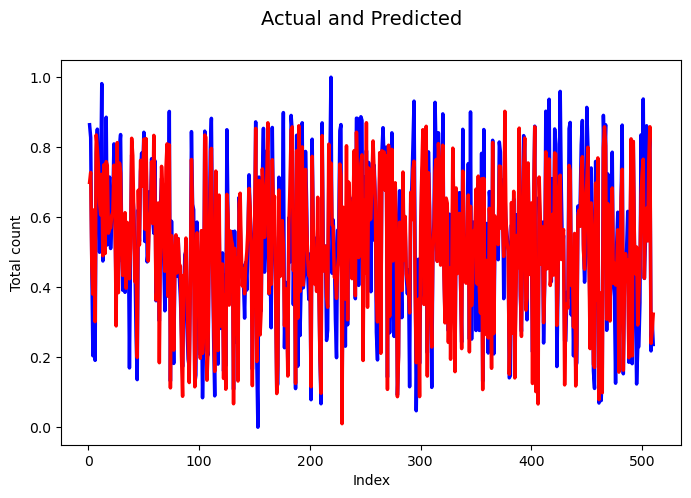

In [86]:
# Actual vs Predicted
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (8, 5))
plt.plot(c,Y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=14)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Total count', fontsize=10)                               # Y-label
plt.show()

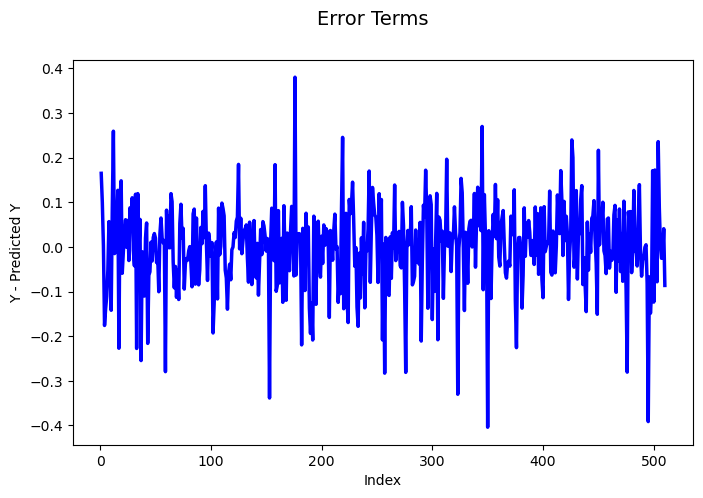

In [87]:
# Error terms
c = [i for i in range(1,511,1)]
fig = plt.figure(figsize = (8, 5))
plt.plot(c,Y_train - Y_train_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=14)              # Plot heading 
plt.xlabel('Index', fontsize=10)                      # X-label
plt.ylabel('Y - Predicted Y', fontsize=10)                # Y-label
plt.show()

## Observations

- The Actual and Predicted values are quite overlapping which indicates that the model is predicting quite well
- The Error Terms are randomy distributed an there is no pattern among them.
- Error distribution having patterns indicates that model could have been better.
- As this is not the case, the model predicts the data well

## Making Predictions using the model
- Use the final model to predict the results for the test data

### Scale the test data set

- We will use min max scaling to rescale the test model similar to train model.
- Min Max scaling would be applied to all numerical variables except dummy variables and string variables as earlier

In [88]:
np.random.seed(0)
train, data_test = train_test_split(bikeData, train_size = 0.7, test_size = 0.3, random_state = 100)

numericalVars = ['temp', 'atemp', 'humidity', 'windspeed', 'totalCount']
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

data_test[numericalVars] = scaler.fit_transform(data_test[numericalVars])

print(data_test.shape)

(219, 30)


### View the key statistics after scaling

In [89]:
data_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,totalCount,spring,summer,winter,LightSnowRain,MistyWeather,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.837006,0.778725,0.534178,0.149434,0.704300,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
535,1,0,1,0.911212,0.855140,0.470416,0.231321,0.725421,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
299,0,0,1,0.496111,0.492303,0.777809,0.443396,0.278853,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
221,0,0,1,0.890149,0.805662,0.236670,0.449811,0.545512,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
152,0,0,1,0.821776,0.749313,0.070723,0.682264,0.569148,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


### Dividing test set into X and Y sets for the model building

In [90]:
Y_test = data_test.pop('totalCount')
X_test = data_test

### Use columns in the training set on the test set

In [91]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by using only selected variables in the model from X_Train
X_test_new = X_test[['year', 'temp', 'humidity', 'windspeed', 'spring', 'LightSnowRain',
       'MistyWeather', 'Jul']]

X_test_new.columns

Index(['year', 'temp', 'humidity', 'windspeed', 'spring', 'LightSnowRain',
       'MistyWeather', 'Jul'],
      dtype='object')

### Make Predictions using the model

In [92]:
# Making predictions
X_test_new = sm.add_constant(X_test_new)
lm = sm.OLS(Y_test.astype(float), X_test_new.astype(float)).fit()
Y_test_pred = lm.predict(X_test_new)

### Compute MSE and R Squared for test model

In [93]:
mse = mean_squared_error(Y_test, Y_test_pred)
r_squared = r2_score(Y_test, Y_test_pred)

#Print MSE and R2 score
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.010329033069799794
r_square_value : 0.8178890230421373


#### Statistical summary of the predicted model on test data

In [94]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totalCount   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.43e-73
Time:                        01:19:18   Log-Likelihood:                 189.97
No. Observations:                 219   AIC:                            -361.9
Df Residuals:                     210   BIC:                            -331.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3821      0.041      9.389      0.000       0.302       0.462
year              0.2581      0.014     17.842      0.000       0.230       0.287
temp              0.3949      0.043      9.185      0.000       0.310       0.480
humidity         -0.1644      0.051     -3.206      0.002      -0.265      -0.063
windspeed        -0.1078      0.042     -2.595      0.010      -0.190      -0.026
spring           -0.2123      0.022     -9.656      0.000      -0.256      -0.169
LightSnowRain    -0.1644      0.052     -3.132      0.002      -0.268      -0.061
MistyWeather     -0.0295      0.020     -1.499      0.135      -0.068       0.009
Jul              -0.0791      0.027     -2.957      0.003      -0.132      -0.026
==============================================================================
Omnibus:                       20.809   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.458
Skew:                          -0.680   Prob(JB):                     2.96e-06
Kurtosis:                       3.971   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Actual versus predicted on test data

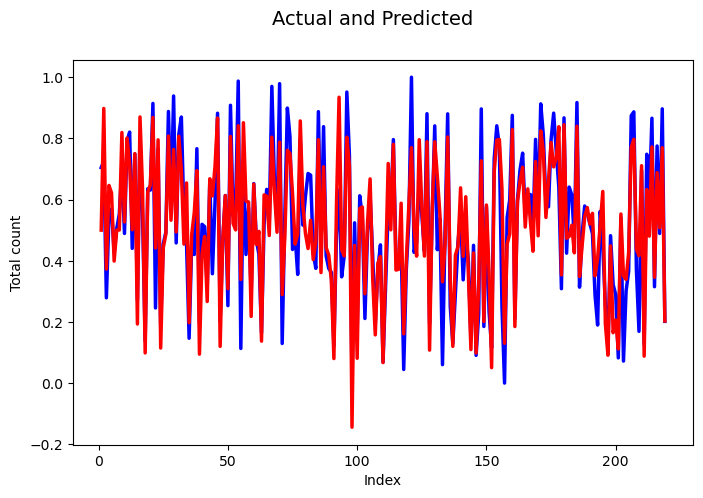

In [95]:
# Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize = (8, 5))
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=14)              # Plot heading 
plt.xlabel('Index', fontsize=10)                               # X-label
plt.ylabel('Total count', fontsize=10)                               # Y-label
plt.show()

### Error distribution on  Test Data

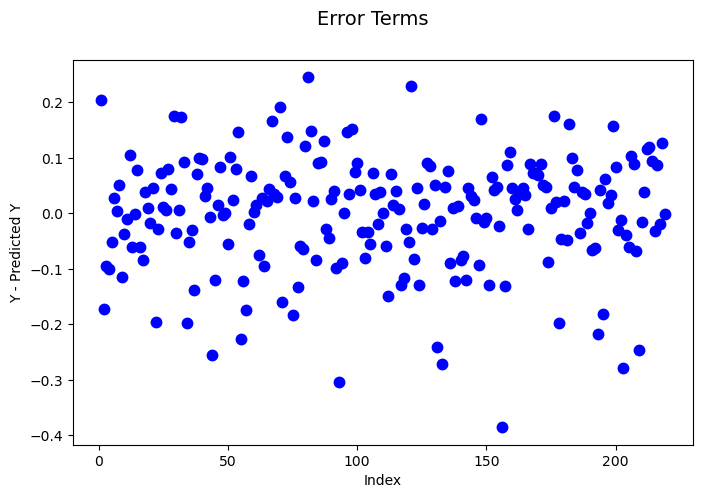

In [96]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize = (8, 5))
plt.scatter(c,Y_test - Y_test_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=14)              # Plot heading 
plt.xlabel('Index', fontsize=10)                      # X-label
plt.ylabel('Y - Predicted Y', fontsize=10)                # Y-label
plt.show()

## Observations

- The Actual and Predicted values are quite overlapping which indicates that the model has generalized well on the test data
- The Error Terms are randomy distributed an there is no pattern among them.
- Error distribution having patterns indicates that model could have been better.
- As this is not the case, the model predicts the data well
- The R squared is 0.818 and Adjusted R2 is 0.811 which is quite close indicating that the model includes all significant variables and there is no insignificant data included
- The R2 of training and test model are also very close 0.824 and 0.811 indicating that the model predicts the data well.
- Constant from training data is 0.3763 and from test data is 0.3821

### Inferences from the bike sharing model

#### The above model is a good model with below 8 variables. The variables below are significant in predicting teh demand for shared bikes
- year
- temp
- humidity
- windspeed
- spring
- LightSnowRain
- MistyWeather
- Jul

__They describe the bike demands upto 82% which is a good model__
__We can see that the equation of our best fitted line based on the final model is:__
    
***

**_totalCount = 0.3763 + 0.2323 x year + 0.4254 x temp - 0.1218 x humidity - 0.1855 x windspeed - 0.1491 x spring - 0.2355 x LightSnowRain - 0.0594 x MistyWeather - 0.0900 * Jul_**

***

**Inferences obtained from above:**

- Count of total rental bikes (totalCount) in year 2019 is 24% higher than that in 2018
- Unit increase in year increases totalCount by 0.2323 provided other independent variables are constant
- Unit increase in actual temperature increases totalCount by 0.4254 provided other independent variables are constant
- Unit increase in humidity decreases totalCount by 0.1218 when other variables are unchanged
- totalCount decreases by 0.1855 with unit increase in windspeed when other variables are unchanged
- totalCount decreases by 0.1491 in spring season when other variables are unchanged
- totalCount also reduces by 0.2355 in light snow with rain when other variables are unchanged
- totalCount reduces by 0.0594 in Misty weather when other variables are unchanged
- totalCount is lowered by 0.0900 in the month of July when other variables are unchanged

- In general demand or bikes increases year on year
- It increases with increase in temperature
- Demand is high in clear weather conditions and low in light snow and rain and zero in heavy rains with snowfall
- Weather conditions like humidity, windspeed, mist, snowfall and rains significantly affect company business
- Business increases by 0.3763 even in the absence of all other independent variables.